In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import svm
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = pd.Categorical.from_codes(iris.target,iris.target_names)
df["target"] = iris.target
X = df.iloc[:,:2]
y = df.iloc[:,5]

C_value = 1000
svc = svm.SVC(kernel="linear", C=C_value).fit(X, y)
support_vector_indices = svc.support_
print(len(support_vector_indices))
support_vectors_per_class = svc.n_support_
print(support_vectors_per_class)


71
[ 2 36 33]


C:\Users\GABRIEL VICERAIRA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


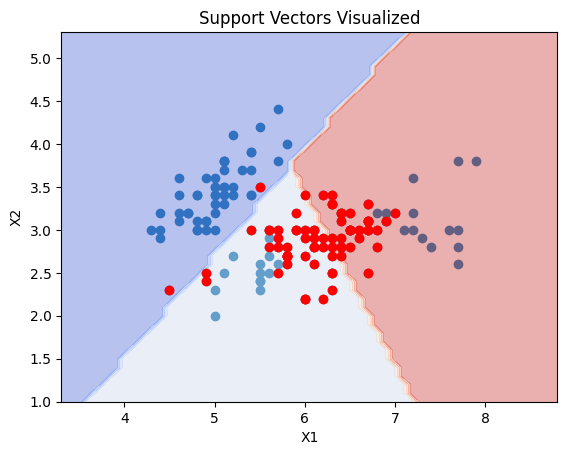

In [41]:
support_vectors = svc.support_vectors_

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx,yy = np.meshgrid( np.arange(x_min, x_max, 0.1), np.arange(y_min,y_max, 0.1) )
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize support vectors
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(support_vectors[:,0], support_vectors[:,1],color="red")
plt.title("Support Vectors Visualized")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

C:\Users\GABRIEL VICERAIRA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\GABRIEL VICERAIRA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\GABRIEL VICERAIRA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\GABRIEL VICERAIRA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0

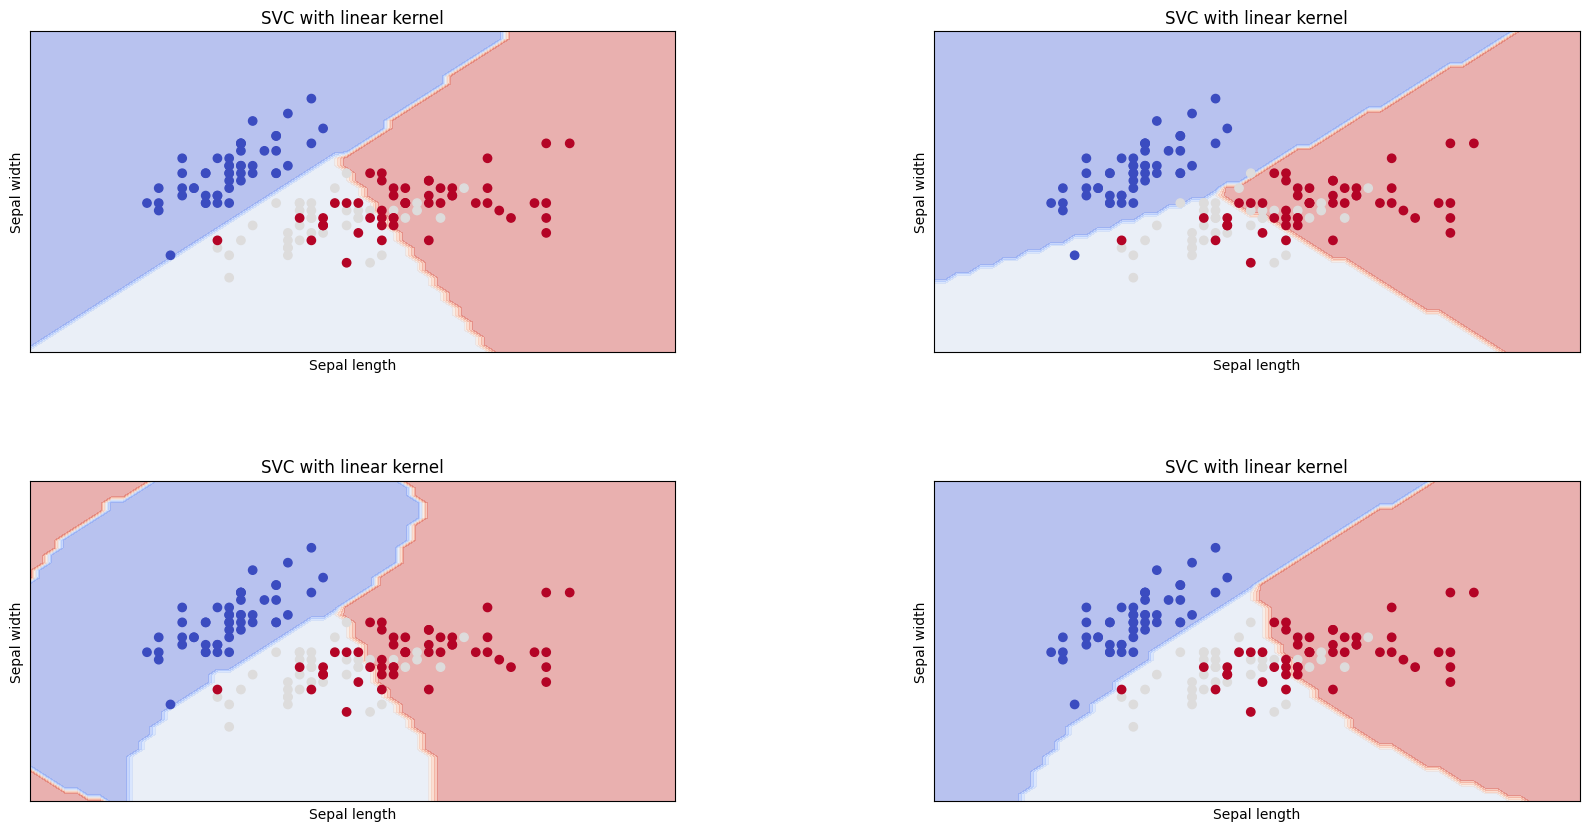

In [45]:
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel="linear", C=C).fit(X, y)
rbf_svc = svm.SVC(kernel="rbf", gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel="poly", degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
titles = ["SVC with linear kernel",
"LinearSVC (linear kernel)",
"SVC with RBF kernel",
"SVC with polynomial (degree 3) kernel"]
xx,yy = np.meshgrid( np.arange(x_min, x_max, 0.1),
np.arange(y_min,
y_max, 0.1) )
plt.figure(figsize=(20,10))
for I, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, I + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm,alpha=0.4)

# Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,cmap=plt.cm.coolwarm)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[0])
plt.show()